<a href="https://colab.research.google.com/github/MatiasJJ/ATML/blob/edits/Ex5/Ex5_Matias_Jakub_Madeleine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise Set 5

Madeleine Ekblom, Matias Jääskeläinen, Jakub Kubečka

## Problem 1

*Learning objective: Naive Bayes  classifier, binary probability distributions, probability computations  in classification.*

Use the discrete naive Bayes classifier in the
following problem. This problem should be solvable by pen, paper, and your pocket calculator. Assume that the class variable is binary $Y$, and
that there are three input features $X_1$, $X_2$, and $X_3$ which
are also binary.

 The training data is as follows:

$$  \begin{array}{cccc}
    Y & X_1 & X_2 & X_3 \\\hline
    0 & 1 & 1 & 0 \\
    0 & 0 & 1 & 1 \\
    0 & 0 & 0 & 0 \\
    1 & 1 & 0 & 0 \\
    0 & 1 & 0 & 0 
  \end{array}$$
  
### Tasks

* Provide estimates of the class-conditional distributions of the form
 $P(X_j = x \mid Y=c)$ for all $j,x,$ and $c$ without smoothing.
 *Hint:* Use empirical frequencies.
* Do the same with [Laplace smoothing](https://en.wikipedia.org/wiki/Additive_smoothing) by using pseudocounts
 $m_{c,j,x}=1$ added to the empirical frequencies. (Recall: You can interpret the pseudocounts as effects of the prior, see E2P1, i.e., Laplace smoothed frequencies can be though as MAP estimates!)
* Assume that the required probabilities have been estimated from
  data.  How is the class value predicted for a new test instance
  $(x_1,x_2,x_3)$?  Provide a formula. How would you classify a test instance $(1,0,0)$ (Remember
  to apply smoothing to the class probabilities $P(Y=c)$, too!)



Without smoothing, using empirical frequencies:

Y=0: $P(Y=0) = 4/5$ 
$$
\begin{array}{cc}
P(X_1 = 1| Y=0)= 2/4 & P(X_1 = 0| Y=0)= 2/4\\
P(X_2 = 1| Y=0)= 2/4 & P(X_2 = 0| Y=0)= 2/4\\
P(X_3 = 1| Y=0)= 1/4 & P(X_3 = 0| Y=0)= 3/4
\end{array}
$$

Y=1: $P(Y=1) = 1/5$
$$
\begin{array}{cc}
P(X_1 = 1| Y=1)= 1 & P(X_1 = 0| Y=1)= 0\\
P(X_2 = 1| Y=1)= 0 & P(X_2 = 0| Y=1)= 1\\
P(X_3 = 1| Y=1)= 0 & P(X_3 = 0| Y=1)= 1
\end{array}
$$

Pseudo-constant $m_{c,j,x}=1$ and $d$= total number of categories=2.

With smoothing:

$p(x_i|y) = \frac{x_i + m}{N+m d}$, where $m$ is the smoothing constant.

Y=0: $P(Y=0) = (4+1)/(5+1*2)=5/7\approx 0.71$ 

Here, $N=4$
$$
\begin{array}{cc}
P(X_1 = 1| Y=0)= (2+1)/(4+1*2)=1/2 & P(X_1 = 0| Y=0)= 1/2\\
P(X_2 = 1| Y=0)= 1/2 & P(X_2 = 0| Y=0)= 1/2 \\
P(X_3 = 1| Y=0)= 1/3  & P(X_3 = 0| Y=0)=2/3 
\end{array}
$$

Y=1: $P(Y=1) = (1+1)/(5+1*2)=2/7\approx 0.29$

Here, $N=1$
$$
\begin{array}{cc}
P(X_1 = 1| Y=1)=2/3  & P(X_1 = 0| Y=1)=1/3\\
P(X_2 = 1| Y=1)=1/3 & P(X_2 = 0| Y=1)=2/3\\
P(X_3 = 1| Y=1)=1/3 & P(X_3 = 0| Y=1)=2/3
\end{array}
$$

In [0]:
import numpy as np
##################
#pYX = p(y|x) = p(y)*p(x1|y)*p(x2|y)*p(x3|y)
def pYX(y,x):
    P=py[y]
    for i in range(3):
        if x[i]==1:
            P=P*pxy[i+1,y]
        else:
            P=P*(1-pxy[i+1,y])  
    return P

def predict(x):
    if pYX(0,x)>pYX(1,x):
        return 0
    else:
        return 1
    
def wrong(a,b):
    if a!=b:
        return "WRONG"
    else:
        return ""

trainX=np.array([[1,1,0],[0,1,1],[0,0,0],[1,0,0],[1,0,0]])
trainY=np.array([0,0,0,1,0])

####################################
print("USING EMPIRICAL FREQUENCIES")
pxy=np.empty([4, 2])
py=np.empty([2,1])
#px1y1 = p(x1=1|y=1)
#px2y1 = p(x2=1|y=1)
pxy[1,0]=2/4
pxy[2,0]=2/4
pxy[3,0]=1/4
pxy[1,1]=1/1
pxy[2,1]=0/1
pxy[3,1]=0/1
#py1 = p(y=1)
py[1]=1/5
py[0]=4/5


print("TRAINING:\ntrain.X  train.Y  predicted Y")
for i in range(trainX.shape[0]):
    print("%s  %i        %i %s" % (trainX[i],trainY[i],predict(trainX[i]),wrong(trainY[i],predict(trainX[i]))))
    
print("\nTEST:")
print("test.X    predicted Y")
print("%s %i" % ([1,0,0],predict([1,0,0])))

print("\n----------------------")
print("USING LAPLACE SMOOTHING")
pxy=np.empty([4, 2])
py=np.empty([2,1])
#px1y1 = p(x1=1|y=1)
#px2y1 = p(x2=1|y=1)
pxy[1,1]=4/6
pxy[2,1]=2/6
pxy[3,1]=2/6
pxy[1,0]=1/2
pxy[2,0]=1/2
pxy[3,0]=1/3
#py1 = p(y=1)
py[1]=2/7
py[0]=5/7

print("TRAINING:\ntrain.X  train.Y  predicted Y")
for i in range(trainX.shape[0]):
    print("%s  %i        %i %s" % (trainX[i],trainY[i],predict(trainX[i]),wrong(trainY[i],predict(trainX[i]))))
    
print("\nTEST:")
print("test.X    predicted Y")
print("%s %i" % ([1,0,0],predict([1,0,0])))

USING EMPIRICAL FREQUENCIES
TRAINING:
train.X  train.Y  predicted Y
[1 1 0]  0        0 
[0 1 1]  0        0 
[0 0 0]  0        0 
[1 0 0]  1        1 
[1 0 0]  0        1 WRONG

TEST:
test.X    predicted Y
[1, 0, 0] 1

----------------------
USING LAPLACE SMOOTHING
TRAINING:
train.X  train.Y  predicted Y
[1 1 0]  0        0 
[0 1 1]  0        0 
[0 0 0]  0        0 
[1 0 0]  1        0 WRONG
[1 0 0]  0        0 

TEST:
test.X    predicted Y
[1, 0, 0] 0


## Problem 2

*Learning objectives: basic principles of decision trees.*

Familiarise yourself with Section 8.1 of James et al. Pick one of the impurity measures presented in Equations (8.5), (8.6), or (8.7). Then simulate the tree building algorithm by hand.

### Tasks

* Sketch a run of the classification tree  algorithm with the toy data set in the Figure above  (binary classification task in ${\mathbb{R}}^2$) and draw the resulting classification tree. Report the values of the chosen impurity measure for each split and try to choose the splits that obtain the best impurity measure. You do not need to worry about overfitting here: the resulting classification tree can fit the training data with no error. Don't worry that you don't count the classes exactly right or that your results are not super-accurate as long as they are "in the ballpark".




The splitting is done just based on the common error (common impurities). We picked common error for splitting, but calculated also other indexes for curiosity.

![bananasplits](/content/Ex5Prob2.png)

1. split

|     | Common error	| Gini index	| Entropy  |
|------|-------|-----|-----|
| 10+11 |	0.36 (+) | 0.46 | 0.66 |
| 00+001+000 |	0.08 (-) | 0.15 | 0.29 |

2.	SPLIT

| |	Common error	| Gini index	| Entropy |
|-----|-----------|-------|------|
| 10	| 0.00 (-)	| 0.00	| 0.00 |
| 11	| 0.00 (+)	| 0.00	| 0.00 |
| 00	| 0.00 (-)	| 0.00	| 0.00 |
| 001+000	| 0.13  (-)	 |0.22	| 0.38 |

3.	SPLIT

| |	Common error	|Gini index	| Entropy |
|------|-------|-----|-----|
|10 |	0.00  (-) |	0.00	|0.00 |
|11	| 0.00  (+) |	0.00	|0.00 |
|00	| 0.00  (-) |	0.00	|0.00 |
|001 |0.00  (+) |	0.00	|0.00 |
|000 |0.00  (-) |	0.00	|0.00 |


## Problem 3

*Learning objectives: basics of k-NN method.*

Consider the problem of applying *k-nearest neighbour* ($k$-NN) classifier to the training dataset $D=\{(x_i,c_i)\}_{i=1}^{14}$, where the covariates $x_i\in{\mathbb{R}}$ and the classes $c_i\in\{-1,+1\}$ are given in below. You should be able to do this by pen and paper.

$$
  \begin{array}{r|r|r}
    i&x_i&c_i\\\hline
    1&0&+1\\
    2&2&+1\\
    3&3&+1\\
    4&5&-1\\
    5&6&+1\\
    6&8&+1\\
    7&9&+1\\
    8&12&-1\\
    9&13&-1\\
    10&15&-1\\
    11&16&+1\\
    12&18&-1\\
    13&19&-1\\
    14&21&-1
  \end{array}
$$

### Tasks

* Where are the classification boundaries for the $1$-NN and $3$-NN classifiers? What are the respective classification errors on the training dataset?
* How does the choice of $k$ in $k$-NN affect the classification boundary (not in the above example but in general)? Give examples of the behaviour for extreme choices.


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
ind=range(1,14+1)
x=np.array([0,2,3,5,6,8,9,12,13,15,16,18,19,21])
c=np.array([1,1,1,-1,1,1,1,-1,-1,-1,1,-1,-1,-1])


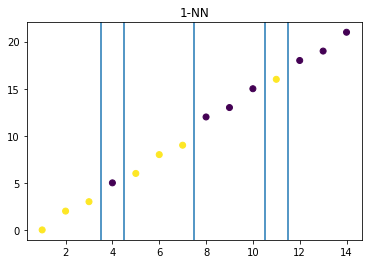

In [14]:
plt.scatter(x=ind,y=x,c=c)
plt.title('1-NN')
plt.axvline(x=3.5)
plt.axvline(x=4.5)
plt.axvline(x=7.5)
plt.axvline(x=10.5)
plt.axvline(x=11.5)

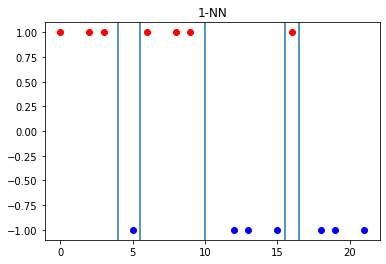

In [9]:
ind_p = c==1
ind_m = c==-1
plt.title('1-NN')
plt.plot(x[ind_p],c[ind_p], 'ro')
plt.plot(x[ind_m],c[ind_m], 'bo')

plt.title('1-NN')

plt.axvline(x=4)
plt.axvline(x=5.5)
plt.axvline(x=10)
plt.axvline(x=15.5)
plt.axvline(x=16.5)

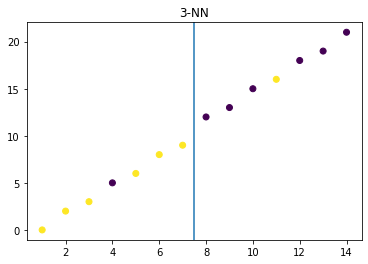

In [15]:
plt.scatter(x=ind,y=x,c=c)
plt.title('3-NN')

plt.axvline(x=7.5)

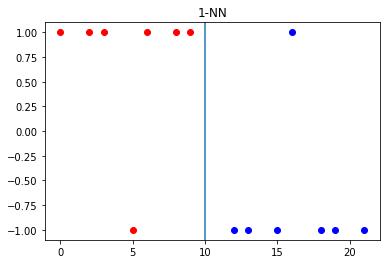

In [16]:
plt.title('3-NN')
plt.plot(x[:7],c[:7], 'ro')
plt.plot(x[7:],c[7:], 'bo')

plt.title('1-NN')

plt.axvline(x=10)

## Problem 4 (bonus)

*Learning objectives: Understanding discriminative vs. generative learning.*

[This problem is optional. Do this if you have time.]

Download Ng et al. (2001). You **do not need to read the full paper** in detail or understand all of the details! Rather try to find the answers to the following questions.

**Reference:** Ng, Jordan (2001) On discriminative vs. generative classifiers: A comparison of logistic regression and naive Bayes. NIPS. <http://papers.nips.cc/paper/2020-on-discriminative-vs-generative-classifiers-a-comparison-of-logistic-regression-and-naive-bayes.pdf>

### Tasks

* Read the *abstract* and the *Introduction*. Is discriminative learning better than generative learning, according to the authors? Justify your answer.
* By a "parametric family of probabilistic models", the authors mean a set of distributions, where each distribution is defined by a set of parameters. An example of such a family is our friend, the family of normal distributions where the parameters are $\mu$ and $\Sigma$. Ng and Jordan denote by $h_{Gen}$ and $h_{Dis}$ two models chosen by optimizing different things. Find an explanation of what these "things" are that are being optimized in the paper, i.e., what characterizes these two models. Which two families do the authors discuss, and what are the $(h_{Gen},h_{Dis})$ pairs for those models?
* Study Figure 1 in the paper. Explain what it suggests (see the last paragraph of the Introduction). Reflect this on the previous item.

# Optional reading

You will not get any points for reading these articles, but to conclude discussion of the classifiers you can, if you want, take a look at the following review:

* Fernández-Delgado et al. (2014) Do we Need Hundreds of Classifiers to Solve Real World Classification Problems?. JMLR. <http://jmlr.org/papers/v15/delgado14a.html>

Hand's article is still timely:

* Hand (2006) Classifier Technology and the Illusion of Progress. Statistical Science. <https://doi.org/10.1214/088342306000000060>